# sierras tutorial

In this tutorial we are going to use data from computational simulations in which we have the trace diffusion coefficient measured at different high temperatures. We will use this python module to extrapolate the value at room temperature.

First we are going to import the libraries we will need

In [1]:
import numpy as np
import matplotlib.pyplot as plt

We use the data obtained in the work of [Fuller](https://doi.org/10.1103/PhysRev.91.193)

In [2]:
temperatures = np.array([1250, 1153.36, 1063.13, 970.65, 861.04, 769.34])
diffusion_coefs = np.array([7.72104e-6, 4.386714e-6, 2.23884e-6, 5.58574e-7, 5.15115e-7, 7.58213e-8])

We import the `ArrheniusDiffusion` class from **sierras**

In [3]:
from sierras.arrhenius import ArrheniusDiffusion

As can be consulted in the API documentation, this class has different methods with which we can fit the data, extrapolate to a desired temperature (room temperature in this case), estimate the activation energy of the diffusive process, plot the data along with the results and convert them to a `pandas.DataFrame`.

We start by creating an arrhenius object from the class

In [4]:
arrhenius = ArrheniusDiffusion(temperatures, diffusion_coefs)

## fit the data

In [5]:
arrhenius.fit()

(-8840.133 <Unit('kelvin')>, -4.745486259460449 <Unit('dimensionless')>)

The value returned by the fit method is a tuple with the slope as the first component and the ordinate to the origin as the second. Both values are instances of `Quantity` of the [pint package](https://github.com/hgrecco/pint), in case we want to use the value only of the slope, without its units, we can access as follows

In [6]:
arrhenius.fit()[0].magnitude

-8840.133

## extrapolate to room temperature

By default, when using the `extrapolate` method we are doing it at room temperature, if you want another temperature you must pass the specific value in the _dtemp_ variable.

In [7]:
arrhenius.extrapolate()

1.3856658198137569e-15 <Unit('centimeter ** 2 / second')>

We see that the diffusion coefficient is in units of centimeters squared over seconds, which are the usual ones in the area and the ones that were defined by default when instantiating the class.

## plot

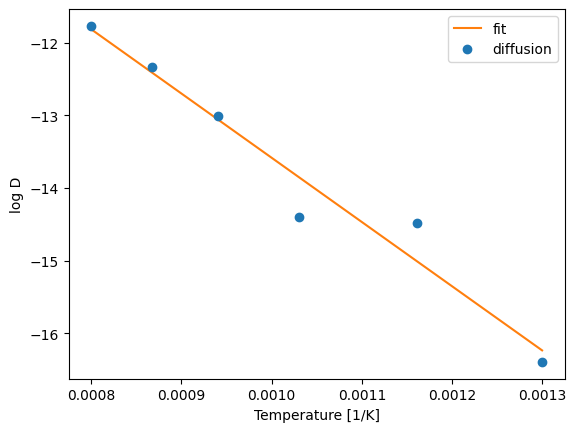

In [8]:
arrhenius.plot()
plt.xlabel("Temperature [1/K]")
plt.ylabel("log D")
plt.legend()
plt.show()